## Applying Linear Regression to Predict Compressive Strength of Concrete

In [700]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [701]:
C1 = pd.read_excel('../Data/SimplifiedConcreteData.xls') 

In [702]:
C1.describe()

,Cement,Slag,FlyAsh,Water,Superplast,Coarse_agg,Fine_agg,Age,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [703]:
abs(C1.corr()['CCS']).sort_values(ascending=False)   

CCS           1.000000
Cement        0.497833
Superplast    0.366102
Age           0.328877
Water         0.289613
Fine_agg      0.167249
Coarse_agg    0.164928
Slag          0.134824
FlyAsh        0.105753
Name: CCS, dtype: float64

## Simple Linear Regression

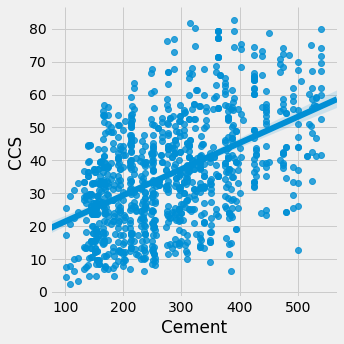

In [704]:
# Let's use Machine learning to predict Concrete Compressive Strength, 'CCS', using Cement as the only feature:
#scatter with regression line/
sns.lmplot(x='Cement', y='CCS', data=C1);

In [705]:
# Now let's divide the data into independent variables (attributes) 
# and dependent variables (labels) preparing to predict values of 'CCS' (y) from 'Cement' (X). 

X = C1['Cement'].values.reshape(-1,1)
y = C1['CCS'].values.reshape(-1,1)

In [706]:
# Next, we split out data 80%/20% into the training set and test set respectively
# We can specify the proportion of the test set using the test_size variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [707]:
# Time to train our algorithm.
# we need to import LinearRegression (imported above), instantiate it, and utilize the fit() method to fit our training data

linreg = LinearRegression()  
linreg.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [708]:
# Let's Check out the value of the intercept and slope calculated by the linear regression algorithm for our dataset

# View the intercept:
print(linreg.intercept_)
# View the slope:
print(linreg.coef_)

[13.34901398]
[[0.07957236]]


In [709]:
# Time to manually determine the predicted value of Concrete Compressive Strength when 
# 'Cement' is equal to 600 kg in a m^3 mixture:

# Compute prediction for Cement = 600 using the equation.
linreg.intercept_ + linreg.coef_[0] * 600

array([61.09242962])

In [710]:
# Finally, we will confirm our manual prediction matches the prediction for Cement = 600 using the predict method:
linreg.predict([[600]])

array([[61.09242962]])

Coefficient interpretation: A 1-unit increase in 'Cement' is associated with a 0.07957236 unit increase in Concrete Compressive Strengh.

Intercept interpretation: When 'Cement' = 0, the estimated value of CCS is 13.34901398.

In [711]:
# Now let's use our test data to make some predictions. 
# We will use our test data to see how accurately our algorithm predicts the percentage score.

y_pred = linreg.predict(X_test)

In [712]:
# Time to compare the actual output values for X_test with the predicted values:

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

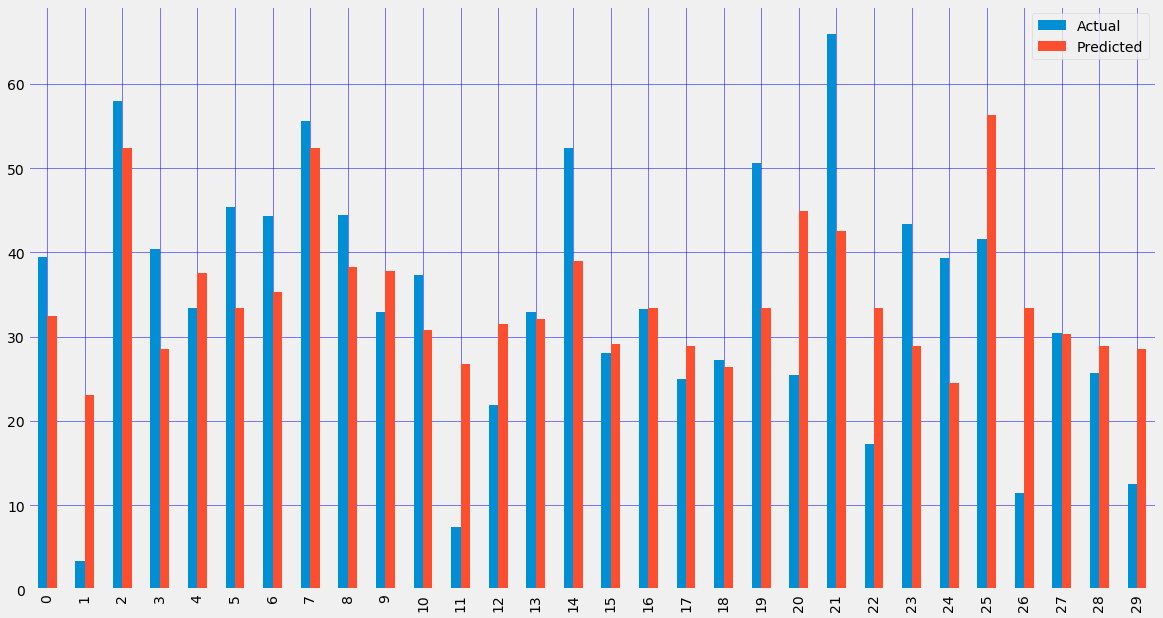

In [713]:
# Now let's visualize the comparison result of our rather imprecise model as a bar graph

df1 = df.head(30)
df1.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()

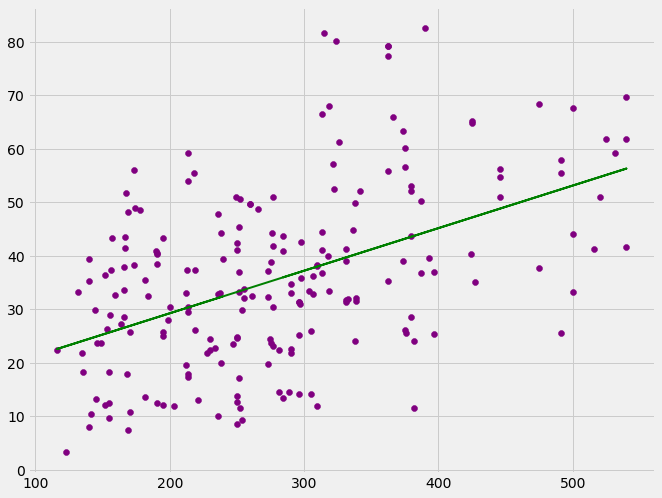

In [714]:
# Combine the Regression Line and the scatter plot together (use a scatter and line graph).

plt.scatter(X_test, y_test,  color='purple')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.show()

In [715]:
# Now, it is time to evaluate the performance of the algorithm using Scikit-Learn library pre-built functions: 
# We will use this step to compare how well all algorithms perform on our dataset. 
# Since this is a regression algorithm, we use the three evaluation metrics of:
#   1 Mean Absolute Error (MAE) is the mean of the absolute value 
#   2  Mean Squared Error (MSE) is the mean of the squared errors
#   3  Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.762188827650506
Mean Squared Error: 213.99423777089643
Root Mean Squared Error: 14.628541888065824


In [716]:
# Calculate the R-Squared value

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.22996004453653096


## Focusing now on a single real-value performance metric, Mean Absolute Error, let's compare our model to the naive baseline to see if we have outperformed. 
## Here we predict the median value of the target on the training set for all examples on the test set. 

In [717]:
# Define a function to calculate the mean absolute error between true values and predictions

def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Next we make the median guess and evaluate it on the test set.

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 34.44
Baseline Performance on the test set: MAE = 13.1214


## Multiple Linear Regression

In [718]:
C1.describe()

,Cement,Slag,FlyAsh,Water,Superplast,Coarse_agg,Fine_agg,Age,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [719]:
C1.columns

Index(['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplast', 'Coarse_agg',
       'Fine_agg', 'Age', 'CCS'],
      dtype='object')

In [720]:
# As we did above, we need to divide the data into independent variables (X) and dependent variables (y)
# This time to predict values of 'CCS' (y) we have the X variable contain all the features.

X = C1[['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplast', 'Coarse_agg',
       'Fine_agg', 'Age']].values
y = C1['CCS'].values

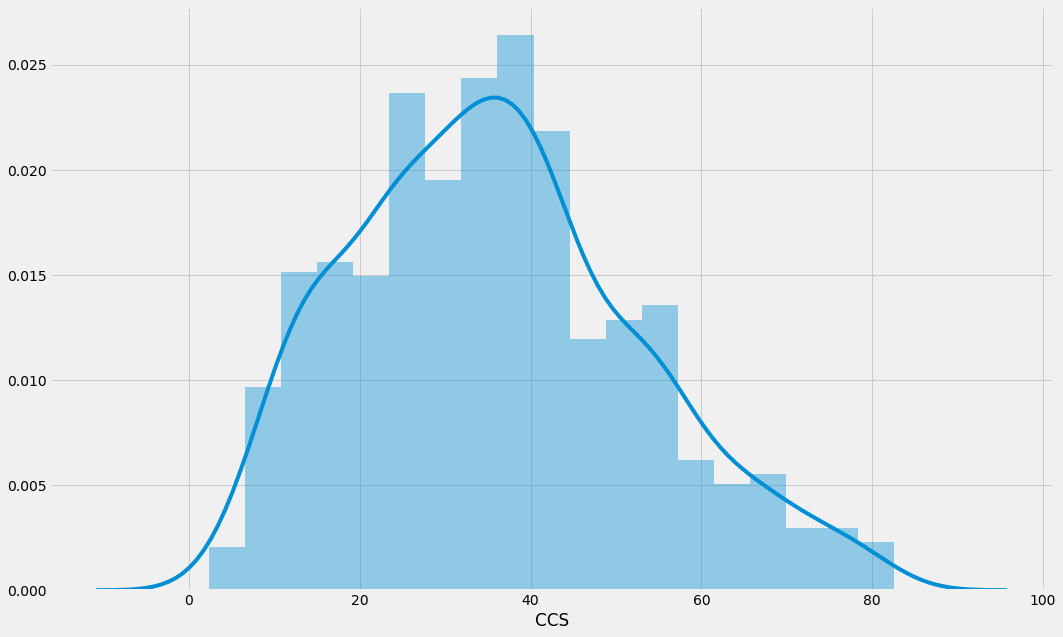

In [721]:
# Let's view the averge value of CCS

plt.figure(figsize=(16,10))
plt.tight_layout()
sns.distplot(C1['CCS']);

It seems that most of the time the value of CCS is between 30 and 40.

In [722]:
# Now, let's split 80% of the data into the training set and 20% of the data into the test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [723]:
# Train the model:

mult_linreg = LinearRegression()  
mult_linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [724]:
# The regression finds the optimal coefficients, let's view them!
# Print the coefficients.
print(mult_linreg.coef_)

[ 0.122247    0.10549584  0.092198   -0.15249399  0.25315015  0.02122665
  0.0219399   0.11599229]


In [725]:
# Let's run a prediction on the test data:

y_pred = mult_linreg.predict(X_test)

In [726]:
# Next we view the difference between the actual value and predicted value.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df.head(30)

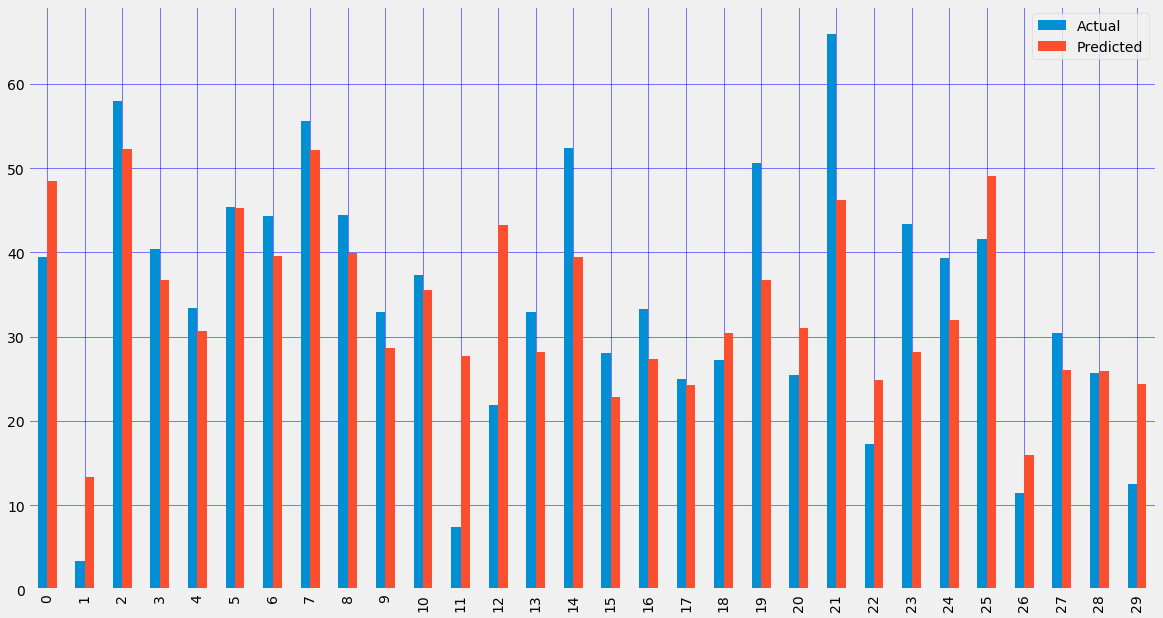

In [727]:
# Now let's plot the comparison of Actual and Predicted values

df2 = df.head(30)
df2.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()

In [728]:
# Evaluate the performance of the algorithm by finding the values for MAE, MSE, and RMSE.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.505897950516264
Mean Squared Error: 113.62526770247418
Root Mean Squared Error: 10.659515359643429


In [729]:
# Calculate the R-Squared value

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.5911291958486671


## Focusing now on a single real-value performance metric, Mean Absolute Error, let's compare our model to the naive baseline to see if we have outperformed. 
## Here we predict the median value of the target on the training set for all examples on the test set. 

In [730]:
# Define a function to calculate the mean absolute error between true values and predictions

def MAE(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Next we make the median guess and evaluate it on the test set.

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % MAE(y_test, baseline_guess))

The baseline guess is a score of 34.44
Baseline Performance on the test set: MAE = 13.1214


## Next we will explore the more specifically prepared 'PreparedConcreteData.xls' dataset from 'Concrete Compressive Strength_EDA.ipynb' to see if we can get a better learning model. 

In [731]:
C2 = pd.read_excel('../Data/PreparedConcreteData.xls') 

In [732]:
C2.columns

Index(['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplast', 'Coarse_agg',
       'Fine_agg', 'Age', 'CCS', 'Contains_Slag', 'Contains_FlyAsh',
       'Contains_Superplast', 'CuredConcrete'],
      dtype='object')

## To Clarify, Contains_Slag, Contains_FlyAsh, Contains_Superplast, & CuredConcrete are factorized/mapped features depicting yes/no on whether these features are factors in the batch of concrete.
## CuredConcrete represents whether the concrete is cured (28 days old or older) or fresh concrete. 
    

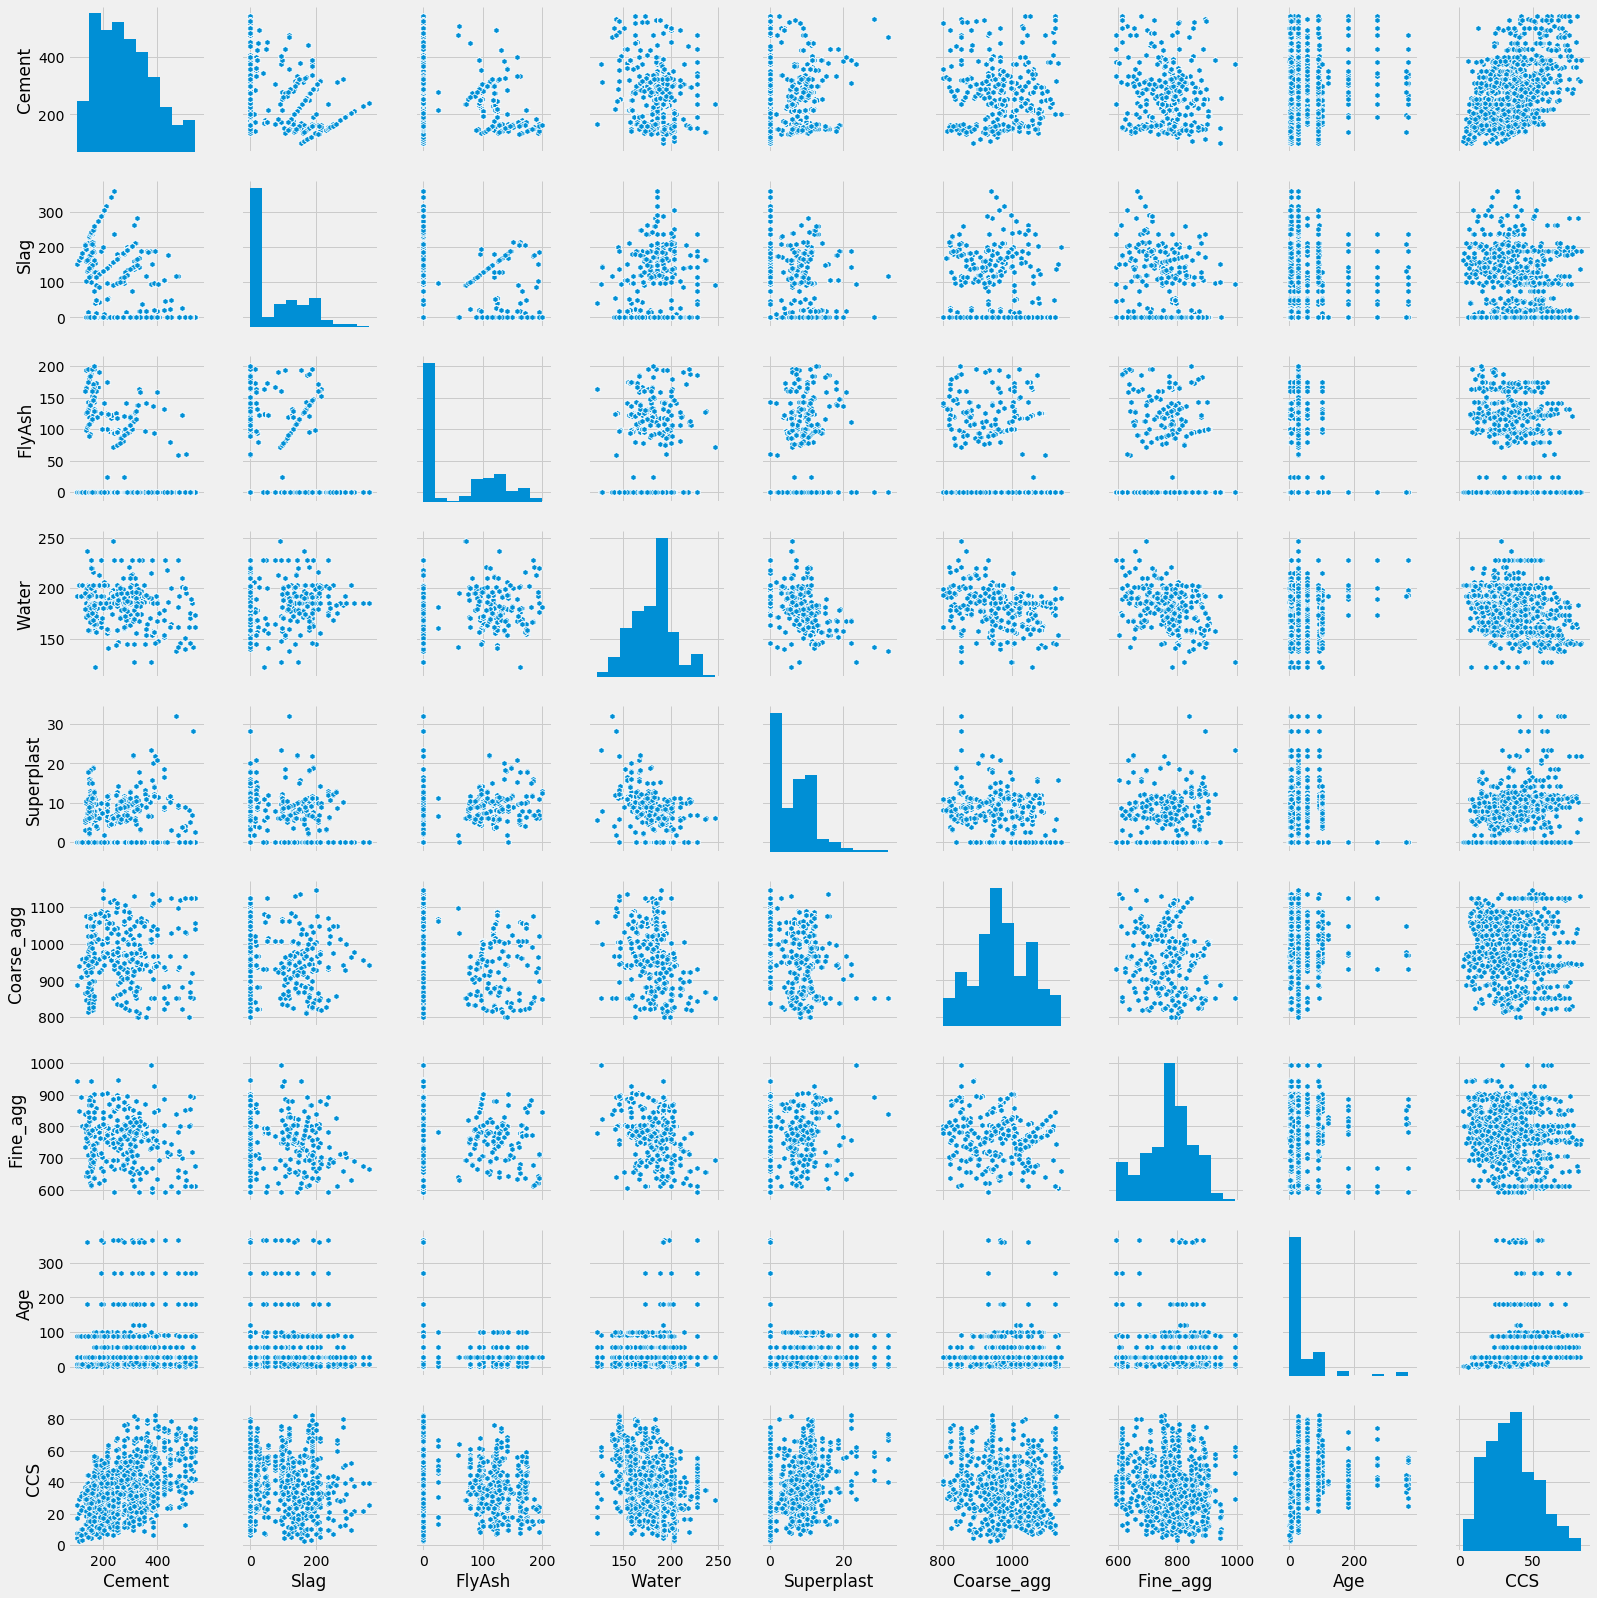

In [733]:
sns.pairplot(C1,markers="h")
plt.show()

In [734]:
# Here we find the variables most correlated with Concrete compressive strength
abs(C2.corr()['CCS']).sort_values(ascending=False)

CCS                    1.000000
CuredConcrete          0.498081
Cement                 0.497833
Superplast             0.366102
Age                    0.328877
Water                  0.289613
Contains_Superplast    0.287894
Contains_Slag          0.226600
Fine_agg               0.167249
Coarse_agg             0.164928
Slag                   0.134824
FlyAsh                 0.105753
Contains_FlyAsh        0.063092
Name: CCS, dtype: float64

In [735]:
abs(C2.corr()['Superplast']).sort_values(ascending=False)

Superplast             1.000000
Contains_Superplast    0.792723
Water                  0.657464
Contains_FlyAsh        0.397292
FlyAsh                 0.377340
CCS                    0.366102
Coarse_agg             0.266303
Fine_agg               0.222501
Age                    0.192717
Contains_Slag          0.172921
Cement                 0.092771
CuredConcrete          0.083015
Slag                   0.043376
Name: Superplast, dtype: float64

In [748]:
# Select five features to use to predict Concrete Compressive Strength

best_cols = ['Cement','Superplast', 'CuredConcrete', 'Water', 'Slag']

In [749]:
# Setup a train test split

X=C2[best_cols]
y=C2['CCS']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [750]:
# Instantiate, fit and predict using a Linear Regressor

CCS_linreg=LinearRegression()
CCS_linreg.fit(X_train,y_train)
y_pred=CCS_linreg.predict(X_test)

In [751]:
# Calculate the R-Squared value


print(r2_score(y_test, y_pred))

0.7340212955018195


In [752]:
# Evaluate the performance of the algorithm by finding the values for MAE, MSE, and RMSE.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.934608495694731
Mean Squared Error: 76.45213817344313
Root Mean Squared Error: 8.743691335668428


In [753]:
# Next we view the difference between the actual value and predicted value.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3 = df.head(30)


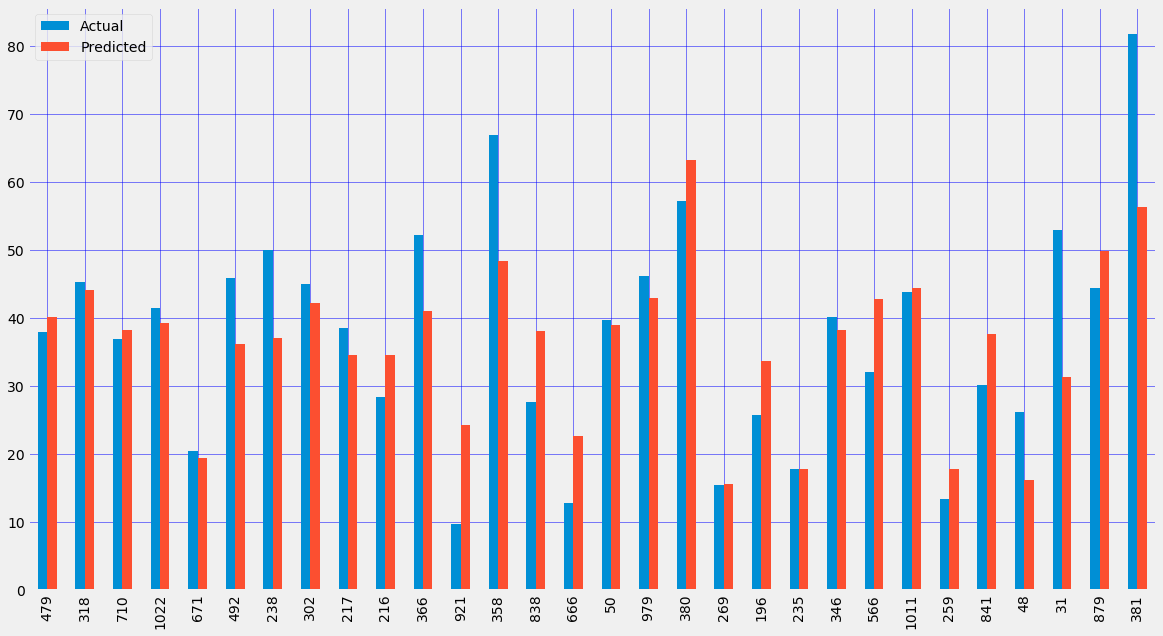

In [754]:
# Now let's plot the comparison of Actual and Predicted values

df3 = df.head(30)
df3.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')

plt.show()

## Using Mean Absolute Error, let's compare our model to the naive baseline to see if we have outperformed. 
## Here we predict the median value of the target on the training set for all examples on the test set. 

In [755]:
# Define a function to calculate the mean absolute error between true values and predictions

def MAE(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Next we make the median guess and evaluate it on the test set.

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % MAE(y_test, baseline_guess))

The baseline guess is a score of 34.44
Baseline Performance on the test set: MAE = 13.7599


## .


## This shows our average estimate on the test set is off by almost 14 points. 
## Since the scores are between 1 and 100, this means the average error from a naive method is nearly 14%.
## In this sense, our model has outperformed the baseline!

In [1]:
# Let’s visualise the prediction:

predict = CCS_linreg.predict(X_test)
plt.scatter(y_test,predict);

## Now let's Evaluate this model using five-fold cross-validation on the data.
## We will report the mean of the mean squared error and the mean R-squared value across five folds.

In [757]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    CCS_linreg = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], CCS_linreg.predict(X.iloc[test_index])))
    scores.append(CCS_linreg.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 85.62111020284785
R2: 0.7014698073394577

Model 2
MSE: 87.58491831951801
R2: 0.7020927347063606

Model 3
MSE: 83.7079463318474
R2: 0.7018750702990828

Model 4
MSE: 75.7453026997546
R2: 0.7016703158562709

Model 5
MSE: 88.01658971316633
R2: 0.701809018687717

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 84.13517345342684
Mean of R2 for all folds: 0.7017833893777778


## Now Let's predict Concrete Compressive Strength With a Random Forest -- a bunch of decision trees

In [791]:
from sklearn.ensemble import RandomForestRegressor

In [792]:
# Define features: Exclude the response (CCS).
feature_cols = C2.columns.drop('CCS')
feature_cols

Index(['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplast', 'Coarse_agg',
       'Fine_agg', 'Age', 'Contains_Slag', 'Contains_FlyAsh',
       'Contains_Superplast', 'CuredConcrete'],
      dtype='object')

In [793]:
# Define X and y.sdf
X = C2[feature_cols]
y = C2.CCS

In [794]:
rfreg = RandomForestRegressor(n_estimators=150,
                              max_features=.46,
                              oob_score=True,
                              random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.46, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=True, random_state=1, verbose=0,
                      warm_start=False)

In [795]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols,
              'importance':rfreg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,Cement,0.254707
7,Age,0.212886
3,Water,0.122137
11,CuredConcrete,0.121659
4,Superplast,0.068898
1,Slag,0.054805
6,Fine_agg,0.048110
5,Coarse_agg,0.041341
2,FlyAsh,0.041068
8,Contains_Slag,0.014153


In [796]:
# Compute the out-of-bag R-squared score.
from sklearn.model_selection import cross_val_score

print((rfreg.oob_score_))

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.9269122227123265


6.782658317613311

In [797]:
# Set up Train Test Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 32)

In [798]:
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=True, random_state=1, verbose=0,
                      warm_start=False)

In [799]:
# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)

(772, 4)
(772, 6)


In [800]:
# To reveal the importance features
model=SelectFromModel(rfreg, threshold='mean', prefit=True)
feature_idx = model.get_support()
feature_name = X.columns[feature_idx]
print(feature_name)

Index(['Cement', 'Water', 'Age', 'CuredConcrete'], dtype='object')


In [801]:
# Let's run these features through a linear regression model

feat_cols = ['Cement', 'Water', 'Age', 'CuredConcrete']

In [802]:
# Setup train test split

X=C2[feat_cols]
y=C2['CCS']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [803]:
# Instantiate, fit and predict using a Linear Regressor

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [804]:
# Calculate the R-Squared value

print(r2_score(y_test, y_pred))

0.64190181325318


In [805]:
# Evaluate the performance of the algorithm by finding the values for MAE, MSE, and RMSE.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.667925927764183
Mean Squared Error: 96.70219327517991
Root Mean Squared Error: 9.833727333782441


In [806]:
# Define a function to calculate the mean absolute error between true values and predictions

def Mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Next we make the median guess and evaluate it on the test set.

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % Mae(y_test, baseline_guess))

The baseline guess is a score of 34.44
Baseline Performance on the test set: MAE = 13.1455
